## 1. Quantities: 
This type of graph shows the levels of variables. Also, these graphs show the variables according to categories or classifications.

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

A database transformed into Latin characters must be uploaded. The following commands should be used in STATA:

cd "....\documents"

unicode analyze enaho.dta

unicode encoding set "latin1" 

unicode translate enaho.dta


### The following database includes enaho modules (200, 300 and 500) for the period 2011 - 20119

In [3]:
enaho = pd.read_stata(r"../_data/enaho.dta")
enaho

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
0,2011,0061,077,11,010701,04,selva,"de 4,001 a 10,000 viviendas",2.011006e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,2.0,4.0,NaN,361.0,familiar,010000
1,2011,0110,112,11,010705,05,selva,Área de empadronamiento rural - aer compuesto,2.011011e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,9.0,400.0,familiar,010000
2,2011,0090,076,11,010205,03,selva,Área de empadronamiento rural - aer compuesto,2.011009e+14,nieto,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,36.0,484.0,familiar,010000
3,2011,0118,080,11,010401,03,selva,Área de empadronamiento rural - aer simple,2.011012e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,6.0,36.0,NaN,529.0,familiar,010000
4,2011,3408,066,11,010402,03,selva,Área de empadronamiento rural - aer compuesto,2.011341e+14,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,0.0,400.0,familiar,010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160767,2019,009703,084,11,250302,05,selva,"401 a 4,000 viviendas",2.019010e+16,yerno/nuera,...,11.0,4.0,15.0,Universitaria incompleta,0.0,0.0,NaN,441.0,familiar,250000
160768,2019,009675,124,11,250107,03,selva,"de 20,001 a 100,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,5.0,25.0,0.0,484.0,familiar,250000
160769,2019,009703,084,11,250302,04,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,9.0,81.0,0.0,676.0,familiar,250000
160770,2019,009700,143,11,250301,03,selva,"401 a 4,000 viviendas",2.019010e+16,hijo/hija,...,6.0,5.0,11.0,Secundaria completa,3.0,9.0,NaN,400.0,familiar,250000


### The number of companies is presented according to classification by number of workers hired

Text(0, 0.5, ' ')

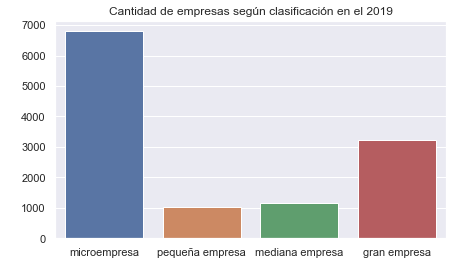

In [9]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(7,4))

x = sns.countplot(x="empresa", data=enaho[enaho['year'] == "2019" ])

plt.title('Cantidad de empresas según clasificación en el 2019')
plt.xlabel(' ')
plt.ylabel(' ')

## Comparing data

 Number of companies according to classification for the period 2017-2019

Text(0.2, 0.01, 'Elboración propia - ENAHO (2011-2019)')

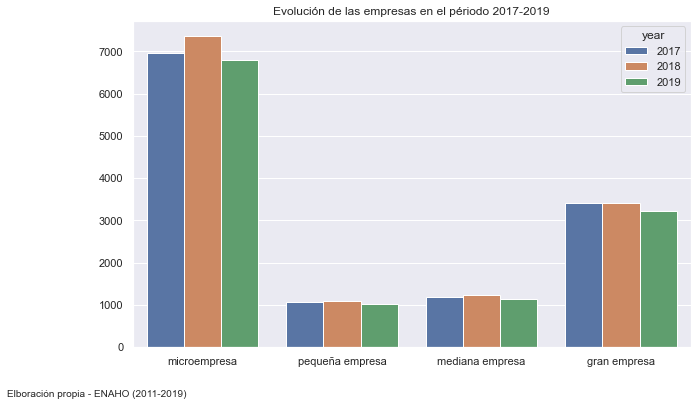

In [10]:
base2 = enaho[enaho['year'] > "2016" ]

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.countplot(x="empresa", hue="year", linewidth=1, data=base2)
plt.title('Evolución de las empresas en el périodo 2017-2019')
plt.xlabel(' ')
plt.ylabel(' ')
txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

### Number of companies based on the worker's pension insurance

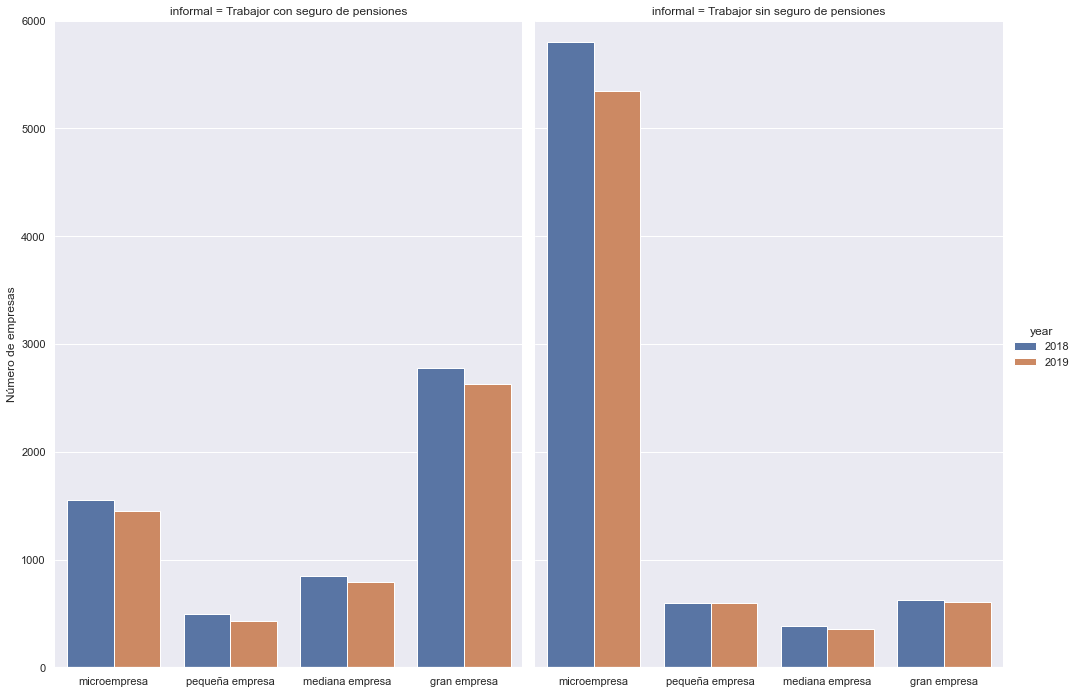

In [13]:
ag = sns.catplot(x="empresa", hue="year", col="informal",data=base2[base2['year'] > "2017" ], 
                 kind="count", height=10, aspect=.7);

(ag.set_axis_labels("", "Número de empresas")
  .set(ylim=(0, 6000))
  .despine(left=True)) 

URL : https://programmerclick.com/article/54791895404/

https://seaborn.pydata.org/generated/seaborn.catplot.html

Text(0.5, 0, ' ')

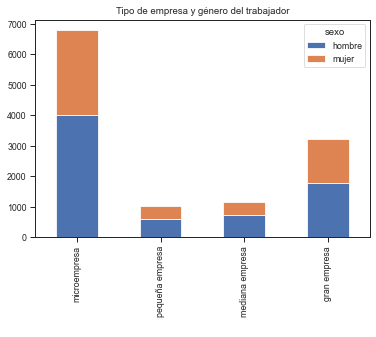

In [14]:
sns.set('paper', style='ticks')

base_2 = enaho[enaho['year'] == "2019" ].groupby( [ 'empresa', 'sexo' ], as_index = False)[['conglome']].count()

base_3 = base_2.pivot(index = 'empresa', columns = 'sexo', values = 'conglome')
base_3

base_3.plot(kind='bar',stacked=True,title='Tipo de empresa y género del trabajador')
plt.xlabel(' ')

Text(0.5, 0, ' ')

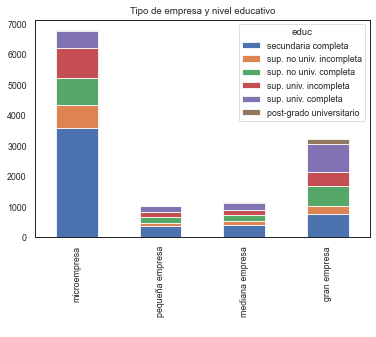

In [15]:
sns.set('paper', style='white')

base_2 = enaho[enaho['year'] == "2019" ].groupby( [ 'empresa', 'educ' ], as_index = False)[['conglome']].count()
base_3 = base_2.pivot(index = 'empresa', columns = 'educ', values = 'conglome')
base_3

base_3.plot(kind='bar',stacked=True,title='Tipo de empresa y nivel educativo')
plt.xlabel(' ')

## 2. Proportions

It mainly shows the participation of the different categories of variables.

In [16]:
base = enaho.groupby([ 'empresa' ]).count()
base

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
empresa,,,,,,,,,,,,,,,,,,,,,
microempresa,58002,58002,58002,58002,58002,58002,58002,58002,58002,58002,...,57991,58002,57991,57991,57565,57565,58001,58002,58002,58002
pequeña empresa,9306,9306,9306,9306,9306,9306,9306,9306,9306,9306,...,9301,9306,9301,9301,9202,9202,9303,9306,9306,9306
mediana empresa,10304,10304,10304,10304,10304,10304,10304,10304,10304,10304,...,10302,10304,10302,10302,10212,10212,10304,10304,10304,10304
gran empresa,29642,29642,29642,29642,29642,29642,29642,29642,29642,29642,...,29639,29642,29639,29639,29392,29392,29640,29642,29642,29642


## Pie 

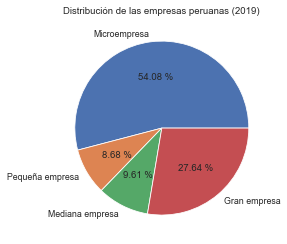

In [17]:
labels=['Microempresa','Pequeña empresa' , 'Mediana empresa', 'Gran empresa']
plt.pie(base['conglome'], labels=labels, autopct='%.2f %%')
plt.title('Distribución de las empresas peruanas (2019)')
plt.show()



In [19]:
base2 = enaho.groupby([ 'sector' ]).count()

,year,conglome,vivienda,hogar,ubigeo,codperso,dominio,estrato,panel,p203,...,acumulado,estud,educa,d_edu,exper,exper_2,tenure_2,edad_2,jefe,ubigeo_2
sector,,,,,,,,,,,,,,,,,,,,,
"agricultura, selvicultura y pesca",11503,11503,11503,11503,11503,11503,11503,11503,11503,11503,...,11501,11503,11501,11501,11460,11460,11138,11503,11503,11503
minería,533,533,533,533,533,533,533,533,533,533,...,533,533,533,533,529,529,533,533,533,533
Manufactura y servicios públcios,12964,12964,12964,12964,12964,12964,12964,12964,12964,12964,...,12961,12964,12961,12961,12873,12873,12960,12964,12964,12964
Construcción,361,361,361,361,361,361,361,361,361,361,...,361,361,361,361,357,357,361,361,361,361
"Comercio, hoteles y restaurantes",16356,16356,16356,16356,16356,16356,16356,16356,16356,16356,...,16351,16356,16351,16351,16227,16227,16354,16356,16356,16356
"Transporte, comunicaciones y alamacenamiento",32123,32123,32123,32123,32123,32123,32123,32123,32123,32123,...,32114,32123,32114,32114,31873,31873,32121,32123,32123,32123
"Finanzas, seguro y bienes raíces",3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,...,3792,3792,3792,3792,3754,3754,3792,3792,3792,3792
"Servicios persnales, sociales y comunales",32379,32379,32379,32379,32379,32379,32379,32379,32379,32379,...,32376,32379,32376,32376,32041,32041,32377,32379,32379,32379


## Donuts

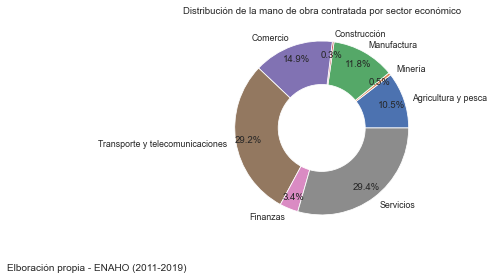

In [20]:
labels=['Agricultura y pesca','Minería','Manufactura','Construcción','Comercio','Transporte y telecomunicaciones', 'Finanzas', 'Servicios']

plt.pie(base2['conglome'], labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
  
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
  
plt.title('Distribución de la mano de obra contratada por sector económico')
txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

plt.show()

## 3. Distributions

The density and frequency distribution functions.

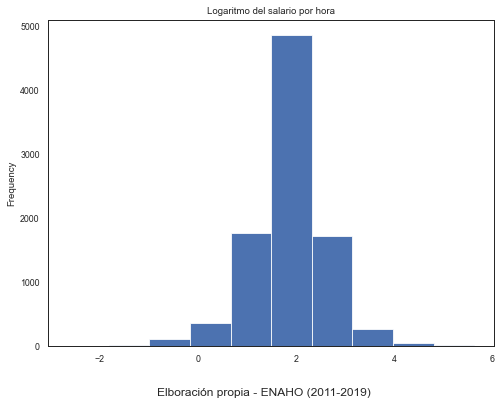

In [21]:
base4 = enaho[enaho['year'] == "2019" ]


base4['l_salario'].plot(kind = 'hist', bins = 10, figsize = (8,6))
plt.title('Logaritmo del salario por hora')

txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

### Reduced frequency

Frequency distribution with a smaller interval (lower relative frequency). Therefore, the height of each bar accounts for a smaller amount.

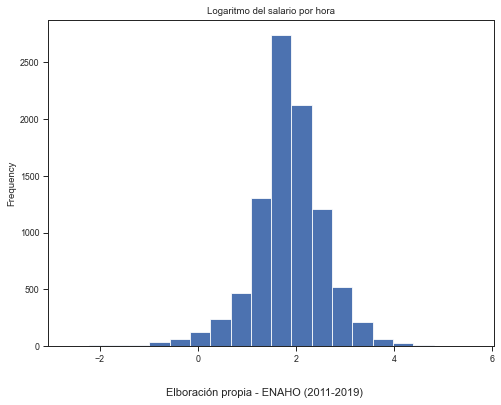

In [22]:
sns.set('paper')
sns.set_style("ticks")

base4['l_salario'].plot(kind = 'hist', bins = 20, figsize = (8,6))
plt.title('Logaritmo del salario por hora')

txt="Elboración propia - ENAHO (2011-2019)"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()

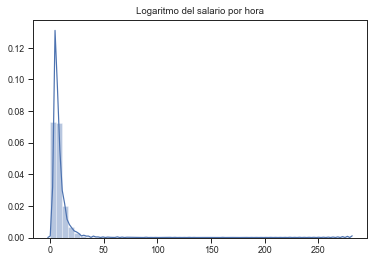

In [23]:
sns.distplot(base4['salario'], label = "Densidad")
plt.title('Logaritmo del salario por hora')
plt.xlabel(' ')
plt.show()

### Logarithm of real hourly wage

This allows correcting the asymmetry presented by the original data. This was due to the dispersion of the data.

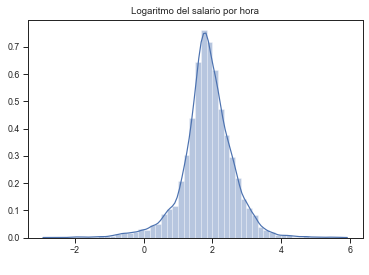

In [24]:

sns.distplot(base4['l_salario'], label = "Densidad")
plt.title('Logaritmo del salario por hora')
plt.xlabel(' ')
plt.show()

Text(0.5, 0, 'Logaritmo del salario')

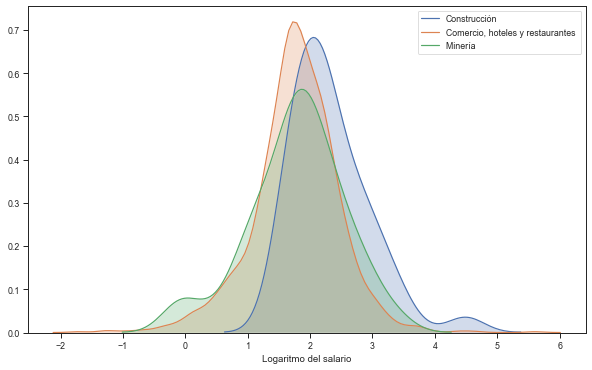

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(base4.l_salario[base4.sector=='Construcción'], label='Construcción', shade=True)
sns.kdeplot(base4.l_salario[base4.sector=='Comercio, hoteles y restaurantes'], label='Comercio, hoteles y restaurantes ', shade=True)
sns.kdeplot(base4.l_salario[base4.sector=='minería'], label='Minería ', shade=True)
plt.xlabel('Logaritmo del salario')



### Using For

A For loop is used to include in the same graph the density function of hourly wages for different occupations.

Text(0.5, 0, 'Logaritmo del salario por tipo de ocupación')

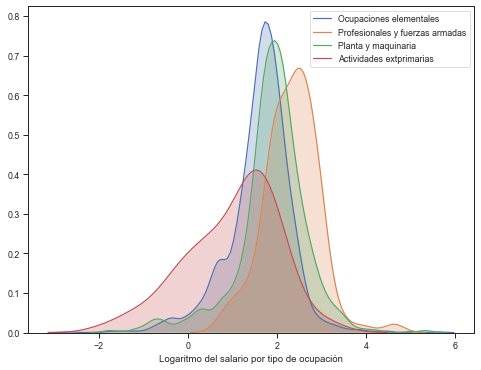

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sector = [ 'Ocupaciones elementales', 'Profesionales y fuerzas armadas', 'Operadores de planta y maquinaria',
          'Trabajo en actividades agrícolas, selvicultura y pesca']
nombre = [ 'Ocupaciones elementales', 'Profesionales y fuerzas armadas', 'Planta y maquinaria','Actividades extprimarias']
    
for a, b in zip(sector, nombre):
        sns.kdeplot(base4.l_salario[base4.labor==a], label=b, shade=True)

plt.xlabel('Logaritmo del salario por tipo de ocupación')

[Text(0, 0, 'Sec. completa'),
 Text(0, 0, 'No uni. incompleta'),
 Text(0, 0, 'No uni. completa'),
 Text(0, 0, 'Uni. incompleta'),
 Text(0, 0, 'Uni. completa'),
 Text(0, 0, 'Posgrado')]

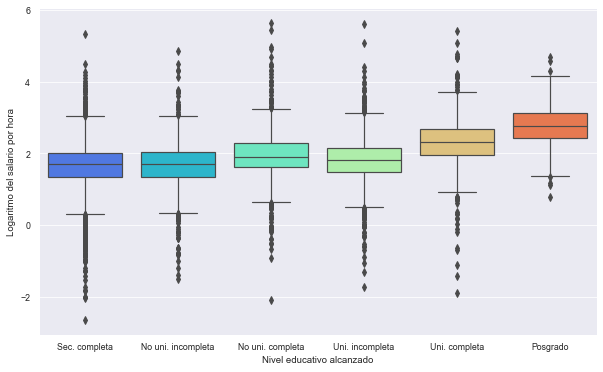

In [236]:
fig, ax = plt.subplots(figsize=(10,6))

box = sns.boxplot(x="educ", y="l_salario", data=enaho[enaho['year'] == "2019" ] ,palette='rainbow')
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Logaritmo del salario por hora')
(box.set_xticklabels(["Sec. completa", "No uni. incompleta", "No uni. completa", "Uni. incompleta", "Uni. completa", "Posgrado"]))



## 4. Relationships

Charts used for both time series and cross-sectional data. These graphs allow to establish certain evidence of correlation between variables.

### Scatter plot 

First, a random sample is drawn from the original database. Subsequently, a dispersion graph is presented between the hourly wage (logarithm) and the non-labor monthly income (logarithm).

Text(0, 0.5, 'Logaritmo de los ingresos no laborales')

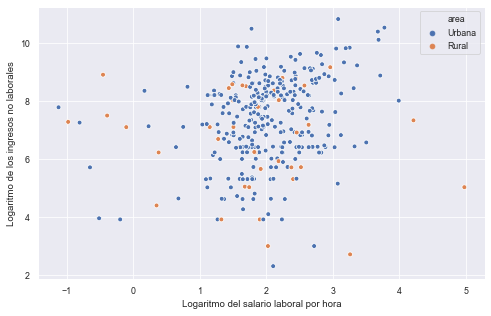

In [341]:
base5 = base4.sample(n = 1500)

sns.set('paper')
sns.scatterplot(data=base5, x="l_salario", y="l_n_labor", hue="area", palette="deep")

plt.xlabel('Logaritmo del salario laboral por hora')
plt.ylabel('Logaritmo de los ingresos no laborales')

In [7]:
macro = pd.read_csv(r"../_data/macroeconomia.csv")
macro['YEAR']  = pd.to_datetime(macro['Fecha'])
macro

,Fecha,IPM,TC,RIN,IPC,RATE,DIPM,DTC,DRIN,DIPC,YEAR
0,2003-1,2.83506,1.25634,9.18519,4.41828,3.7500,13.73166,0.83108,12.50532,2.25690,2003-01-01
1,2003-2,2.85371,1.25004,9.21777,4.42295,3.8000,12.48664,0.16400,13.17984,2.76396,2003-02-01
2,2003-3,2.84717,1.24993,9.24303,4.43407,3.8200,7.76170,0.65330,17.18115,3.33857,2003-03-01
3,2003-4,2.80982,1.24554,9.24188,4.43356,3.8400,1.97256,0.69980,13.92729,2.56103,2003-04-01
4,2003-5,2.88617,1.24686,9.23065,4.43324,3.7800,6.81493,0.92160,12.37214,2.39028,2003-05-01
...,...,...,...,...,...,...,...,...,...,...,...
199,2019-8,3.74485,1.22252,11.12236,4.88368,2.5642,3.71183,2.73013,12.37958,2.01920,2019-08-01
200,2019-9,3.74443,1.20844,11.12124,4.88375,2.5038,7.63091,1.29986,15.82517,1.83408,2019-09-01
201,2019-10,3.70510,1.20622,11.13029,4.88486,2.5045,0.48716,0.71850,15.12033,1.86310,2019-10-01
202,2019-11,3.69955,1.20500,11.11988,4.88594,2.2984,0.97267,-0.08858,11.80591,1.84959,2019-11-01


Text(0.5, 0.01, 'Elboración propia - BCRP')

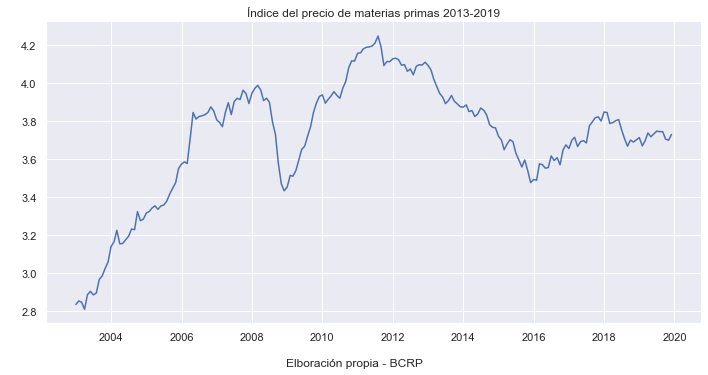

In [34]:
sns.set('notebook')

sns.relplot(x="YEAR", y="IPM", kind="line", color="b" , data=macro, height=5, aspect=2)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Índice del precio de materias primas 2013-2019')

txt="Elboración propia - BCRP"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

#### Series in a single image

This graph shows a positive relationship between the change in international reserves and the commodity index.

Text(0.2, 0.01, 'Elboración propia - BCRP')

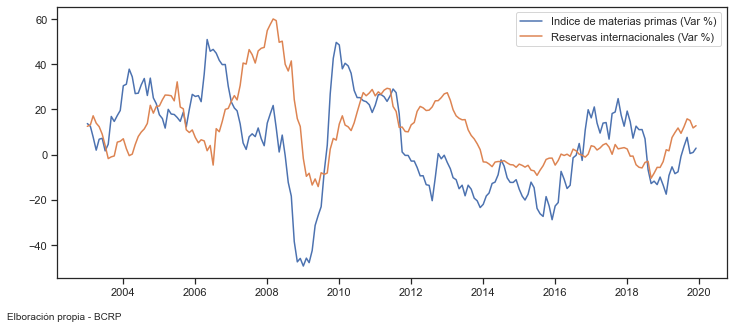

In [35]:
sns.set('notebook')
sns.set_style("ticks")

#plt.plot(macro['YEAR'], macro[['DIPM','DRIN']])
fig, ax = plt.subplots(figsize=(12,5))

x = macro['YEAR']
y1 = macro['DIPM']
y2 = macro['DRIN']

plt.plot(x, y1, label ='Indice de materias primas (Var %)')
plt.plot(x, y2, label ='Reservas internacionales (Var %)')

plt.legend(loc='upper right')

txt="Elboración propia - BCRP"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)

### Dual-line Plots

Text(0.2, 0.01, 'Elboración propia - BCRP')

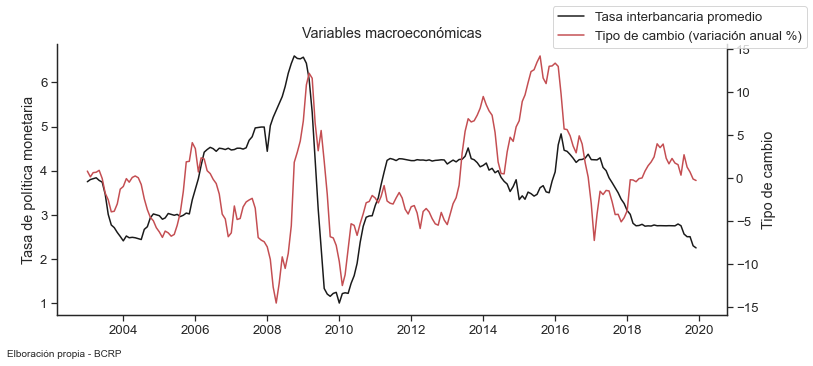

In [36]:
sns.set('notebook', style = "ticks", font_scale= 1.2)

fig, ax = plt.subplots(figsize=(12,5))
lineplot = sns.lineplot(x= "YEAR" , y= "RATE", data=macro, 
                        label = 'Tasa interbancaria promedio ', color="k", legend=False)

#sns.despine()
plt.ylabel('Tasa de política monetaria')
plt.xlabel(' ')
plt.title('Variables macroeconómicas');

ax2 = ax.twinx()
lineplot2 = sns.lineplot(x= "YEAR", y= "DTC", data=macro, ax=ax2, color = "r", 
                         label ='Tipo de cambio (variación anual %)', legend=False) 
sns.despine(right=False)
plt.ylabel('Tipo de cambio')
ax.figure.legend();

txt="Elboración propia - BCRP"  
plt.figtext(0.2, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=10)